In [25]:
import pandas as pd
import numpy as np
import requests
#from client import FtxClient
import mplfinance as mpf

import datetime
import time
from PIL import Image
from joblib import dump,load
import streamlit as st
from sklearn import *
import ccxt

## Using the FTX Market API

In [26]:
api_url= 'https://ftx.com/api'
api = '/markets'
url= api_url+api
markets = requests.get(url).json()
df = pd.DataFrame(markets['result'])
df.set_index('name', inplace = True)
df.iloc[:,:4].head()


,enabled,postOnly,priceIncrement,sizeIncrement
name,,,,
1INCH-PERP,True,False,0.0001,1.00
1INCH-0930,True,False,0.0001,1.00
1INCH-1230,True,False,0.0001,1.00
1INCH/USD,True,False,0.0001,1.00
AAPL-0930,True,False,0.0100,0.01


In [3]:
df.head()

,enabled,postOnly,priceIncrement,sizeIncrement,minProvideSize,last,bid,ask,price,type,...,highLeverageFeeExempt,largeOrderThreshold,change1h,change24h,changeBod,quoteVolume24h,volumeUsd24h,priceHigh24h,priceLow24h,tokenizedEquity
name,,,,,,,,,,,,,,,,,,,,,
1INCH-PERP,True,False,0.0001,1.00,1.00,0.6046,0.6045,0.6046,0.6046,future,...,False,350.0,-0.008690,-0.034340,-0.030157,5.955079e+06,5.955079e+06,0.6485,0.6032,NaN
1INCH-0930,True,False,0.0001,1.00,1.00,0.6022,0.5999,0.6030,0.6022,future,...,False,350.0,-0.007090,-0.033852,-0.028553,7.999211e+03,7.999211e+03,0.6448,0.5985,NaN
1INCH-1230,True,False,0.0001,1.00,1.00,0.5854,0.5824,0.5862,0.5854,future,...,False,350.0,-0.006955,-0.036537,-0.031917,1.060386e+03,1.060386e+03,0.6258,0.5841,NaN
1INCH/USD,True,False,0.0001,1.00,1.00,0.6052,0.6042,0.6046,0.6046,spot,...,True,280.0,-0.009340,-0.033877,-0.031090,1.362927e+06,1.362927e+06,0.6482,0.6033,NaN
AAPL-0930,True,False,0.0100,0.01,0.01,152.0000,151.0500,152.5600,152.0000,future,...,False,350.0,0.000000,0.006956,0.004826,1.562595e+04,1.562595e+04,154.6900,150.2400,True


## `Get individual Market Data`

In [120]:
market_name='USDT/USD'
path=f'/markets/{market_name}'
url=api_url+path
url

'https://ftx.com/api/markets/USDT/USD'

In [121]:
res= requests.get(url).json()
df=pd.DataFrame(res)['result']
df

ask                               0.9999
baseCurrency                        USDT
bid                               0.9998
change1h                             0.0
change24h                         0.0001
changeBod                            0.0
enabled                             True
futureType                          None
highLeverageFeeExempt               True
isEtfMarket                        False
largeOrderThreshold               2400.0
last                              0.9999
minProvideSize                      0.01
name                            USDT/USD
postOnly                           False
price                             0.9999
priceHigh24h                      0.9999
priceIncrement                    0.0001
priceLow24h                       0.9998
quoteCurrency                        USD
quoteVolume24h           68614944.861371
restricted                         False
sizeIncrement                       0.01
type                                spot
underlying      

In [124]:
Price=df.iloc[15]
priceHigh=df.iloc[16]
last=df.iloc[11]
print(Price)
diference=f'{((Price-last)/last)*100}%'
diference

0.9999


'0.0%'

## `Get historical data`

In [126]:
api_url= 'https://ftx.com/api'
market_name='USDT/USD'
resolution=60*60*24*30 #seconds*minutes*hours
start=datetime.datetime(2021,2,1).timestamp()
print(start)


1612159200.0


In [127]:
path=f'/markets/{market_name}/candles?resolution={resolution}&start={start}'
url=api_url+path
url

'https://ftx.com/api/markets/USDT/USD/candles?resolution=2592000&start=1612159200.0'

In [128]:
d=datetime.datetime(2020,10,5)
date=d.date()
date

datetime.date(2020, 10, 5)

In [129]:

historical = requests.get(url).json()
historical = pd.DataFrame(historical['result'])
#historical.drop(['startTime'], axis = 1, inplace=True)
historical['date']=pd.to_datetime(historical['startTime'])
#historical=historical.set_index('date')
historical=historical.drop(columns=['startTime', 'time'])

historical['variance']=historical['close'].rolling(window=5).mean().shift(1)
historical['variance2']=historical['close'].rolling(window=2).mean().shift(1)
historical.head(15)


,open,high,low,close,volume,date,variance,variance2
0,1.00075,1.0243,0.9888,1.0005,6.718076e+06,2019-09-16 00:00:00+00:00,NaN,NaN
1,1.00050,1.0200,0.9946,0.9981,2.639796e+07,2019-10-15 00:00:00+00:00,NaN,NaN
2,0.99810,1.0328,0.9938,0.9989,1.440273e+07,2019-11-14 00:00:00+00:00,NaN,0.99930
3,0.99890,1.0005,0.9957,0.9992,2.275640e+07,2019-12-14 00:00:00+00:00,NaN,0.99850
4,0.99920,1.0032,0.9961,1.0025,3.792907e+07,2020-01-13 00:00:00+00:00,NaN,0.99905
5,1.00250,1.0104,0.9896,1.0084,3.158725e+07,2020-02-12 00:00:00+00:00,0.99984,1.00085
6,1.00840,1.0518,0.9938,1.0010,5.909415e+07,2020-03-13 00:00:00+00:00,1.00142,1.00545
7,1.00100,1.0030,0.9573,1.0009,3.403911e+07,2020-04-12 00:00:00+00:00,1.00200,1.00470
8,1.00090,1.0015,0.9970,1.0001,2.305034e+07,2020-05-12 00:00:00+00:00,1.00240,1.00095
9,1.00010,1.0007,0.9977,1.0000,2.953406e+07,2020-06-11 00:00:00+00:00,1.00258,1.00050


In [130]:
price=historical['close'].iat[-1]
price

0.9999

In [60]:
import plotly.graph_objects as go


fig= go.Figure(data=[go.Candlestick(name="bitcoin",x=historical['date'],
                open=historical['open'],
                high=historical['high'],
                low=historical['low'],
                close=historical['close']),
                go.Scatter(name='MovAv5',x=historical['date'],y=historical['variance'], line=dict(color='orange',width=1)),
                go.Scatter(name='MovAv2',x=historical['date'],y=historical['variance2'], line=dict(color='green',width=1))
                ])
fig.update_layout(
    title={'text':"Velas",'y':0.9,'x':0.5,'xanchor':'center','yanchor':'top'},
    xaxis_title="Date",
    yaxis_title="Price",
    legend_title="Legend Title")
 #   font=dict(
  #      family="Sans serif, monospace",
   #     size=18,
    #    color="RebeccaPurple"))

fig.show()

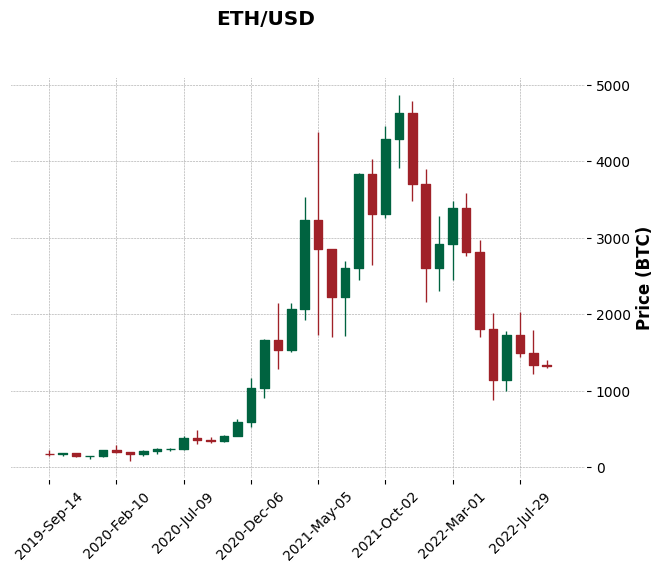

In [18]:
import mplfinance as mpf

mpf.plot(historical, type='candle',style='charles', title=market_name, ylabel='Price (BTC)')

## `Get Order Book Data`

In [154]:
depth=20
path=f'/markets/{market_name}/orderbook?depth={depth}'
url=api_url+path
url

'https://ftx.com/api/markets/ETH/USD/orderbook?depth=20'

In [155]:
res=requests.get(url).json()
bids=pd.DataFrame(res['result']['bids'])
asks=pd.DataFrame(res['result']['asks'])
bids.columns=['Bid Price','Bid Amount']
asks.columns=['Ask Price', 'Ask_Amount']
bids.head()
asks.head()

,Ask Price,Ask_Amount
0,1335.7,9.597
1,1335.8,13.743
2,1335.9,150.013
3,1336.0,6.699
4,1336.1,36.721


In [110]:
df=pd.merge(bids, asks, left_index=True, right_index=True)
df.head()

,Bid Price,Bid Amount,Ask Price,Ask_Amount
0,1375.3,32.309,1375.4,14.043
1,1375.2,49.289,1375.5,4.967
2,1375.1,20.620,1375.6,22.447
3,1375.0,36.060,1375.7,3.584
4,1374.9,11.357,1375.8,53.229


In [111]:
df.describe()

,Bid Price,Bid Amount,Ask Price,Ask_Amount
count,20.000000,20.000000,20.000000,20.00000
mean,1374.350000,28.506300,1376.350000,41.00765
std,0.591608,16.484352,0.591608,25.20140
min,1373.400000,6.765000,1375.400000,3.58400
25%,1373.875000,16.018750,1375.875000,22.36925
50%,1374.350000,22.767000,1376.350000,37.07050
75%,1374.825000,37.762750,1376.825000,58.37650
max,1375.300000,67.537000,1377.300000,81.85200


## `Get trades`

In [113]:
path=f'/markets/{market_name}/trades'
url=api_url+path
url

'https://ftx.com/api/markets/ETH/USD/trades'

In [114]:
res=requests.get(url).json()
df=pd.DataFrame(res['result'])
df.head()

,id,price,size,side,liquidation,time
0,5048127533,1371.2,0.445,sell,False,2022-09-27T15:55:21.451831+00:00
1,5048127532,1371.4,0.289,sell,False,2022-09-27T15:55:21.451831+00:00
2,5048127508,1371.4,0.075,sell,False,2022-09-27T15:55:21.236335+00:00
3,5048127507,1371.4,0.364,sell,False,2022-09-27T15:55:21.236335+00:00
4,5048127506,1371.4,0.364,sell,False,2022-09-27T15:55:21.236335+00:00


## `FTX Futures`

In [116]:
url='https://ftx.com/api/futures'
res=requests.get(url).json()
df=pd.DataFrame(res['result'])
df.head()

,name,underlying,description,type,expiry,perpetual,expired,enabled,postOnly,priceIncrement,...,group,closeOnly,change1h,change24h,changeBod,volumeUsd24h,volume,openInterest,openInterestUsd,indexAdjustment
0,1INCH-PERP,1INCH,1INCH Token Perpetual Futures,perpetual,None,True,False,True,False,0.0001,...,perpetual,False,-0.004519,0.014127,0.023222,4.382141e+06,6907521.00,8370323.00,5.347799e+06,NaN
1,1INCH-0930,1INCH,1INCH Token September 2022 Futures,future,2022-09-30T03:00:00+00:00,False,False,True,False,0.0001,...,quarterly,False,-0.012965,0.012336,0.019358,9.354948e+03,14868.00,116797.00,7.380402e+04,NaN
2,1INCH-1230,1INCH,1INCH Token December 2022 Futures,future,2022-12-30T03:00:00+00:00,False,False,True,False,0.0001,...,quarterly,False,-0.003375,0.013732,0.023943,3.271670e+02,532.00,21391.00,1.326456e+04,NaN
3,AAPL-0930,AAPL,Apple September 2022 Futures,future,2022-09-30T20:00:00+00:00,False,False,True,False,0.0100,...,quarterly,False,-0.009459,-0.001447,0.003834,1.738325e+04,113.91,8660.31,1.315068e+06,NaN
4,AAPL-1230,AAPL,Apple December 2022 Futures,future,2022-12-30T21:00:00+00:00,False,False,True,False,0.0100,...,quarterly,False,-0.011479,-0.001186,0.003044,1.008197e+05,662.02,788.31,1.194841e+05,NaN


## `Opción ccxt`

In [16]:
bitmex=ccxt.bitmex()
hitbtc=ccxt.hitbtc()
huobipro = ccxt.huobipro()


In [18]:
bitmex.target_names

AttributeError: 'bitmex' object has no attribute 'target_names'

In [17]:
BTC=hitbtc.load_markets()
df1=pd.DataFrame(BTC)
df1

,RBIS/ETH,LRC/BTC,MXC/USDT,SWFTC/USDT,CTSI/BTC,JASMY/USDT,DAG/ETH,FTT/BTC,EKO/USDT,BCPT/BTC,...,SWT/ETH,ENJ/ETH,TTCC/USDT,DFC/BTC,WRX/USDT,HIVE/BTC,FTM/USDT,LEVL/BTC,RFR/USDT,AAVE/ETH
id,RBISETH,LRCBTC,MXCUSDT,SWFTCUSD,CTSIBTC,JASMYUSDT,DAGETH,FTTBTC,EKOUSDT,BCPTBTC,...,SWTETH,ENJETH,TTCCUSDT,DFCBTC,WRXUSD,HIVEBTC,FTMUSD,LEVLBTC,RFRUSD,AAVEETH
symbol,RBIS/ETH,LRC/BTC,MXC/USDT,SWFTC/USDT,CTSI/BTC,JASMY/USDT,DAG/ETH,FTT/BTC,EKO/USDT,BCPT/BTC,...,SWT/ETH,ENJ/ETH,TTCC/USDT,DFC/BTC,WRX/USDT,HIVE/BTC,FTM/USDT,LEVL/BTC,RFR/USDT,AAVE/ETH
base,RBIS,LRC,MXC,SWFTC,CTSI,JASMY,DAG,FTT,EKO,BCPT,...,SWT,ENJ,TTCC,DFC,WRX,HIVE,FTM,LEVL,RFR,AAVE
quote,ETH,BTC,USDT,USDT,BTC,USDT,ETH,BTC,USDT,BTC,...,ETH,ETH,USDT,BTC,USDT,BTC,USDT,BTC,USDT,ETH
baseId,RBIS,LRC,MXC,SWFTC,CTSI,JASMY,DAG,FTT,EKO,BCPT,...,SWT,ENJ,TTCC,DFC,WRX,HIVE,FTM,LEVL,RFR,AAVE
quoteId,ETH,BTC,USD,USD,BTC,USD,ETH,BTC,USD,BTC,...,ETH,ETH,USD,BTC,USD,BTC,USD,BTC,USD,ETH
active,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
type,spot,spot,spot,spot,spot,spot,spot,spot,spot,spot,...,spot,spot,spot,spot,spot,spot,spot,spot,spot,spot
linear,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
inverse,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [11]:
Bitmex=bitmex.load_markets()

In [13]:
df=pd.DataFrame(Bitmex)

In [14]:
df

,.EVOL7D,.BADAXBT,.BADAXBT30M,.BBCHXBT,.BBCHXBT30M,.BEOSXBT,.BEOSXBT30M,.BXRPXBT,.BXRPXBT30M,.BTRXXBT,...,ETH/BTC:BTC-220930,ETH/USD:BTC-220930,ETH/USDT:USDT-220930,ETH/BTC:BTC-221230,ETH/USD:ETH-221230,ETH/USDT:USDT-221230,ETH/USD:BTC-221230,ETH_USDT,LTC/USD:BTC,LTC/USDT:USDT
id,.EVOL7D,.BADAXBT,.BADAXBT30M,.BBCHXBT,.BBCHXBT30M,.BEOSXBT,.BEOSXBT30M,.BXRPXBT,.BXRPXBT30M,.BTRXXBT,...,ETHU22,ETHUSDU22,ETHUSDTU22,ETHZ22,ETHUSDZ22_ETH,ETHUSDTZ22,ETHUSDZ22,ETH_USDT,LTCUSD,LTCUSDT
symbol,.EVOL7D,.BADAXBT,.BADAXBT30M,.BBCHXBT,.BBCHXBT30M,.BEOSXBT,.BEOSXBT30M,.BXRPXBT,.BXRPXBT30M,.BTRXXBT,...,ETH/BTC:BTC-220930,ETH/USD:BTC-220930,ETH/USDT:USDT-220930,ETH/BTC:BTC-221230,ETH/USD:ETH-221230,ETH/USDT:USDT-221230,ETH/USD:BTC-221230,ETH_USDT,LTC/USD:BTC,LTC/USDT:USDT
base,ETH,ADA,ADA,BCH,BCH,EOS,EOS,XRP,XRP,TRX,...,ETH,ETH,ETH,ETH,ETH,ETH,ETH,ETH,LTC,LTC
quote,XXX,BTC,BTC,BTC,BTC,BTC,BTC,BTC,BTC,BTC,...,BTC,USD,USDT,BTC,USD,USDT,USD,USDT,USD,USDT
baseId,ETH,ADA,ADA,BCH,BCH,EOS,EOS,XRP,XRP,TRX,...,ETH,ETH,ETH,ETH,ETH,ETH,ETH,ETH,LTC,LTC
quoteId,XXX,XBT,XBT,XBT,XBT,XBT,XBT,XBT,XBT,XBT,...,XBT,USD,USDT,XBT,USD,USDT,USD,USDT,USD,USDT
active,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,True,True
type,index,index,index,index,index,index,index,index,index,index,...,future,future,future,future,future,future,future,index,swap,swap
linear,None,None,None,None,None,None,None,None,None,None,...,True,True,True,True,False,True,True,None,True,True
inverse,None,None,None,None,None,None,None,None,None,None,...,False,False,False,False,True,False,False,None,False,False


In [7]:
exchange_id = 'binance'
exchange_class = getattr(ccxt, exchange_id)


hitbtc_markets = hitbtc.load_markets()

print(hitbtc.id, hitbtc_markets)
print(bitmex.id, bitmex.load_markets())
print(huobipro.id, huobipro.load_markets())

print(hitbtc.fetch_order_book(hitbtc.symbols[0]))
print(bitmex.fetch_ticker('BTC/USD'))
print(huobipro.fetch_trades('LTC/USDT'))

# sell one ฿ for market price and receive $ right now
#print(bitmex.id, bitmex.create_market_sell_order('BTC/USD', 1))

# limit buy BTC/EUR, you pay €2500 and receive ฿1  when the order is closed
#print(bitmex.id, bitmex.create_limit_buy_order('BTC/EUR', 1, 2500.00))

# pass/redefine custom exchange-specific order params: type, amount, price, flags, etc...
#kraken.create_market_buy_order('BTC/USD', 1, {'trading_agreement': 'agree'})


fetch Request: hitbtc GET https://api.hitbtc.com/api/2/public/currency RequestHeaders: {'User-Agent': 'python-requests/2.28.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'} RequestBody: None


RequestTimeout: hitbtc GET https://api.hitbtc.com/api/2/public/currency